# Compare CMIP5 zos fields computed with the NCL and Python codes

In [5]:
import os
import sys

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sys.path.append('../code/')
import mod_loc as loc

In [9]:
python_data_dir = '../outputs/'
ncl_data_dir = '../../Data_Proj/Data_CMIP5/CorrectedZOS_TS_yearly/'
ar5_data_dir = '../../Data_Proj/Data_AR5/Ocean/1x1_glob/'

### First check the field difference

### Compare time series of CMIP5 zos from AR5, NCL and Python code for the Netherlands

In [11]:
sce = 'rcp85'

ref_period = [1986,2005]
area = 'dutch_coast'
if area == 'dutch_coast':
    lon_min, lon_max = 3, 7
    lat_min, lat_max = 51, 54
elif area == 'north_sea':
    lon_min, lon_max = -2, 9
    lat_min, lat_max = 48, 60


### Start with the NCL code results

In [12]:
files = os.listdir(f'{ncl_data_dir}ZOS_{sce}')
MOD = []
for i in range(len(files)):
    MOD.append(files[i][22:-3])
MOD.sort()


In [25]:
zos_ncl_df = pd.DataFrame(dict(time=np.arange(1950,2101)))
zos_ncl_df = zos_ncl_df.set_index('time')
for mod in MOD:
    with xr.open_dataset(f'{ncl_data_dir}ZOS_HIST/CorrectedZOS_EXPrcp85_{mod}.nc') as ds:
        ds = loc.rotate_longitude(ds)
        ds = ds.sel(time=slice(1950,2005), longitude=slice(lon_min,lon_max), latitude=slice(lat_min,lat_max))
        zos = ds['CorrectedZOS_reg'].mean(dim=['longitude','latitude'])
    with xr.open_dataset(f'{ncl_data_dir}ZOS_{sce.upper()}/CorrectedZOS_EXP{sce}_{mod}.nc') as ds:
        ds = loc.rotate_longitude(ds)
        ds = ds.sel(longitude=slice(lon_min,lon_max), latitude=slice(lat_min,lat_max))
        zos_sce = ds['CorrectedZOS_reg'].mean(dim=['longitude','latitude'])
    zos_ncl_df[mod] = xr.concat([zos, zos_sce],dim='time').to_dataframe()
    zos_ncl_df[mod] = zos_ncl_df[mod] - zos_ncl_df[mod].loc[ref_period[0]:ref_period[1]].mean()
zos_ncl_df['mean'] = zos_ncl_df.mean(axis=1)
zos_ncl_df.iloc[-10:]

/Users/dewilebars/anaconda3/envs/p38ds/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


,ACCESS1-0,CCSM4,CMCC-CESM,CMCC-CM,CMCC-CMS,CSIRO-Mk3-6-0,CanESM2,EC-EARTH,FGOALS-g2,GFDL-CM3,...,MIROC5,MPI-ESM-LR,MPI-ESM-MR,MRI-CGCM3,NorESM1-M,NorESM1-ME,bcc-csm1-1,bcc-csm1-1-m,inmcm4,mean
time,,,,,,,,,,,,,,,,,,,,,
2091,15.572315,10.180002,5.463511,24.601944,10.346528,6.909520,-0.102904,14.933788,0.079504,24.088091,...,24.324713,-0.040087,-0.010298,15.326360,0.761701,-1.719167,24.458958,5.578457,20.736584,12.532559
2092,21.178617,7.663977,3.987948,22.660404,11.967188,11.890850,0.731860,13.795238,4.164505,29.175531,...,25.811159,-0.030594,-0.011026,13.910945,-2.320386,0.538276,17.031618,5.387198,17.633171,11.882516
2093,38.143635,6.586297,6.544329,27.360893,6.945980,14.967196,2.088260,15.790039,2.608142,22.482611,...,25.350285,-0.070862,-0.011276,16.901615,-2.765058,0.354567,10.091387,1.162836,14.320494,12.468934
2094,29.910686,1.342185,6.525693,25.804028,10.579607,8.498766,3.004406,13.079357,2.311287,25.173962,...,23.938623,-0.089802,-0.011130,10.494689,-1.279316,-0.738890,11.452415,7.913496,19.071493,12.263794
2095,38.197113,4.014819,6.523345,28.398914,13.718646,7.527484,2.581376,14.201090,4.378552,22.540998,...,26.784491,-0.086828,-0.010502,17.872646,-4.946102,-3.471683,14.871355,14.177640,21.056774,12.949786
2096,34.332558,7.214124,4.262253,29.142887,13.333365,6.731658,-0.398684,15.248619,3.270639,25.090202,...,25.615644,-0.073946,-0.010063,11.556277,-2.124214,2.539068,23.110243,8.062343,18.209980,13.062988
2097,33.398460,4.574159,1.678437,26.541576,17.463406,7.971465,0.243594,16.036867,2.721822,20.420925,...,26.096148,-0.094187,-0.013729,20.095522,-1.671185,-3.360790,17.034580,5.335296,14.655032,12.819701
2098,28.601433,-7.240761,6.118134,27.689983,21.951319,6.890568,0.922480,17.587057,-0.892576,20.333712,...,27.547564,-0.076170,-0.011098,19.830713,-3.186649,-6.351035,14.978611,2.097462,15.872104,12.232738
2099,37.327511,0.336388,10.350751,28.677402,12.260129,5.328540,1.406564,16.827095,4.966297,21.148546,...,31.498381,-0.055572,-0.010585,14.565268,-5.241736,-6.821888,22.912279,3.288311,14.084723,11.962865


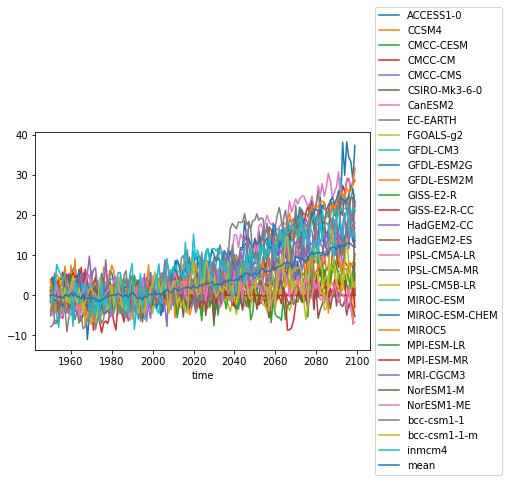

In [26]:
odyn_df.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Continue with Python code

In [18]:
cmip5_zos = xr.open_mfdataset(f'{python_data_dir}CMIP5_zos_{sce}/CMIP5_zos_{sce}_*.nc')
cmip5_zos = loc.rotate_longitude(cmip5_zos)

In [19]:
cmip5_zos_sel = cmip5_zos.sel(time=slice(2005,2101), lon=slice(lon_min,lon_max), lat=slice(lat_min,lat_max))
zos_python = cmip5_zos_sel['CorrectedReggrided_zos'].mean(dim=['lon','lat'])

zos_python_df = pd.DataFrame(dict(time=np.arange(2006,2101)+0.5))
zos_python_df = zos_python_df.set_index('time')

for mod in zos_python.model.values:
    zos_python_df[mod] = zos_python.sel(model=mod).drop('model').to_dataframe()
zos_python_df

/Users/dewilebars/anaconda3/envs/p38ds/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/dewilebars/anaconda3/envs/p38ds/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


,ACCESS1-0,CCSM4,CMCC-CESM,CMCC-CM,CMCC-CMS,CNRM-CM5,CSIRO-Mk3-6-0,CanESM2,EC-EARTH,GFDL-CM3,...,MIROC-ESM-CHEM,MIROC5,MPI-ESM-LR,MPI-ESM-MR,MRI-CGCM3,NorESM1-M,NorESM1-ME,bcc-csm1-1,bcc-csm1-1-m,inmcm4
time,,,,,,,,,,,,,,,,,,,,,
2006.5,0.033441,-1.394685,-2.616785,-0.449493,-2.448488,-1.137654,-0.573220,-0.168312,0.384235,5.886408,...,1.233863,-0.887355,2.911187,4.046981,-3.521669,-0.070294,2.432131,4.844052,3.104388,3.996169
2007.5,-0.211662,8.449260,4.816145,-1.708885,-0.583152,-1.771270,1.650600,-0.115160,4.133457,2.878132,...,1.648273,-2.210855,-0.125494,2.432523,-7.638173,-1.222520,3.190978,1.678045,0.578257,8.585342
2008.5,-0.422387,6.912265,0.854288,-3.888348,-0.544416,-3.256400,-1.198337,-0.082709,2.981900,3.461435,...,3.241337,-2.149180,-0.868665,1.747479,5.667852,-0.219587,3.397842,5.078379,-4.481478,4.488855
2009.5,0.659360,4.423867,1.620673,-4.013094,-1.309846,-1.127067,-1.269926,0.093951,-1.792575,2.796515,...,2.882270,-1.712586,3.517202,-5.808292,0.303098,-3.214045,-3.619898,2.053427,1.339363,6.051166
2010.5,1.219459,0.223446,0.466885,1.672209,0.347884,-1.979433,-0.565733,-0.760153,-0.041887,6.636929,...,6.662150,0.234877,3.503817,-1.240588,-2.607605,1.511487,2.544107,-2.796587,3.529323,5.264042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096.5,31.408444,8.769774,5.126263,31.593757,16.375708,11.067950,8.325819,-1.102127,13.144035,24.482371,...,24.179925,25.104473,8.396203,21.781906,12.227099,-1.645523,2.981254,20.815725,8.671141,16.069852
2097.5,29.851504,5.926092,2.567911,28.321551,19.562802,12.641144,10.134695,0.602909,14.075430,19.843561,...,26.698945,25.367584,11.273934,15.992786,19.777535,-1.214355,-3.037521,14.629875,5.741828,12.516512
2098.5,25.699323,-6.533064,7.173806,30.250122,24.944021,8.085738,8.291547,1.938713,15.812138,19.745939,...,25.692150,27.111805,12.535310,18.214200,18.773051,-2.500111,-5.681525,12.674465,2.781742,13.942995


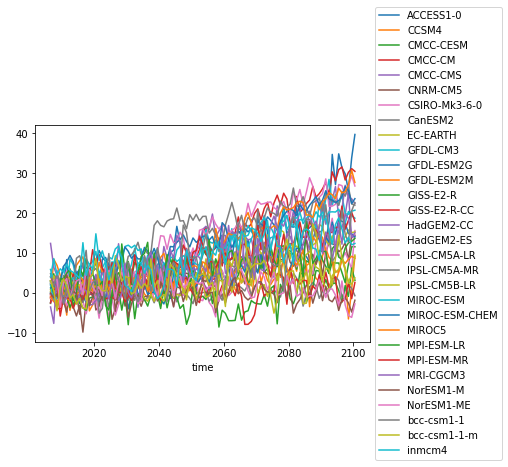

In [20]:
zos_python_df.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Compare model per model

Only for the NCL and Python code since AR5 doesn't have the right files

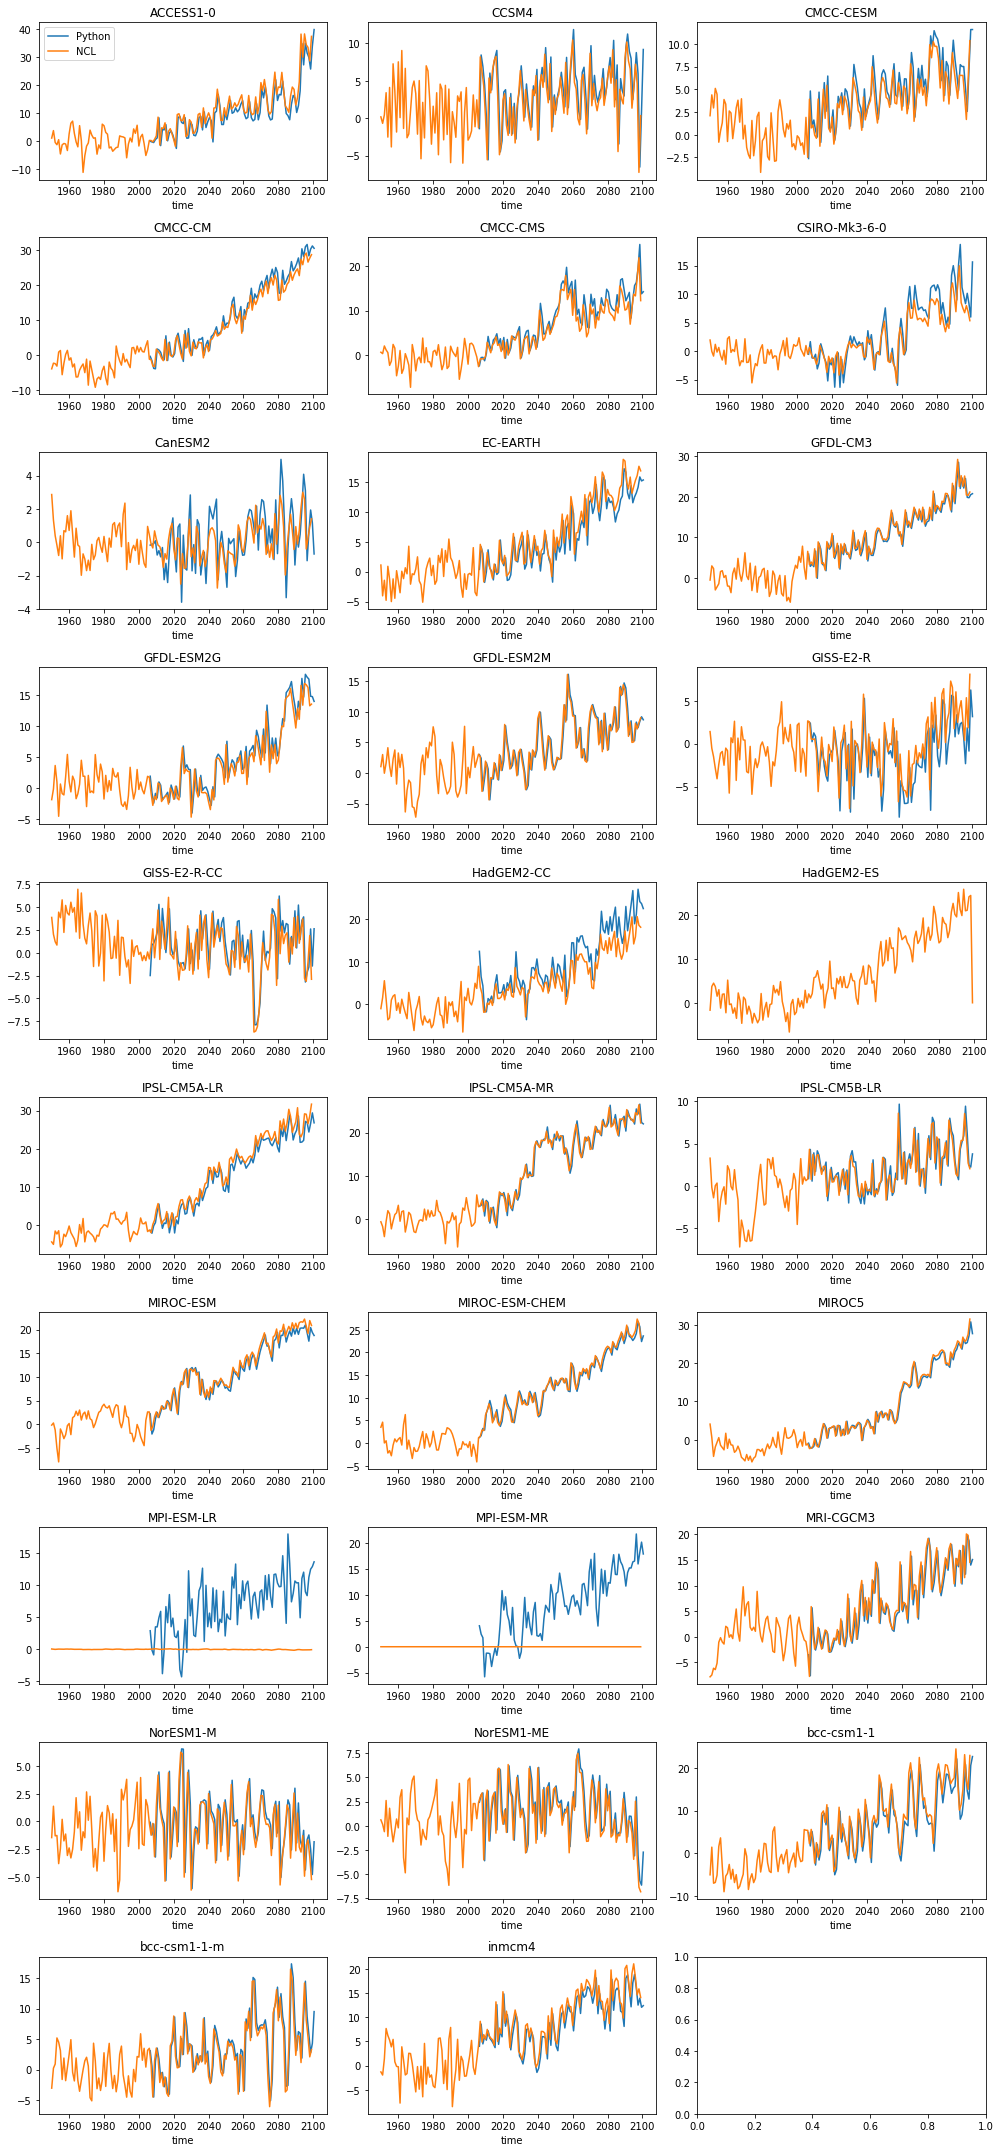

In [64]:
model_intersection = list(set(zos_python_df.columns) & set(zos_ncl_df.columns))
model_intersection.sort()

nb_cols = 3
nb_rows = int(np.ceil(len(model_intersection)/nb_cols))
fig, axes = plt.subplots(nrows=nb_rows, ncols=nb_cols, figsize=(14,30))

for idx, mod in enumerate(model_intersection):
    ax = zos_python_df[mod].plot(ax=axes[int(idx/nb_cols),idx%nb_cols], label='Python', title=mod) #label='python', legend='Python'
    ax = zos_ncl_df[mod].plot(ax=axes[int(idx/nb_cols),idx%nb_cols], label='NCL')
    if idx == 0:
        ax.legend()

fig.tight_layout()
    

The two methods compare very well for the Dutch coast.